Appunti del 13 novembre
=======================

Funzione Map( [x,y] )( Dom ): applica una funzione vettoriale ai vertici di un intervallo tra 0 e 2Pi( Dom )
			   Dom non è altro che un array. 
			   x=lamda p: r * cos( p[0] )

In [1]:
from larlib import *

x= lambda p : cos( p[0] ) 
y= lambda p : sin( p[0] )
dom= INTERVALS(2*PI)(32)  
MAP([x,y])(dom) # ho generato un valore geometrico una circonferenza, se voglio una porzione di circonferenza dovrò lavorare sul dominio	
dom= T(1)(PI/4)(INTERVALS(2*PI)(32)) # traslo la circonferenza di Pi greco quarti 
VIEW(MAP([x,y])(dom))

Evaluating fenvs.py..
...fenvs.py imported in 0.00473592023059 seconds


c:\programmi\python27\lib\site-packages\larlib\larstruct.py:233: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self.body = [item for item in data if item != None]


<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000DC6CED0> >

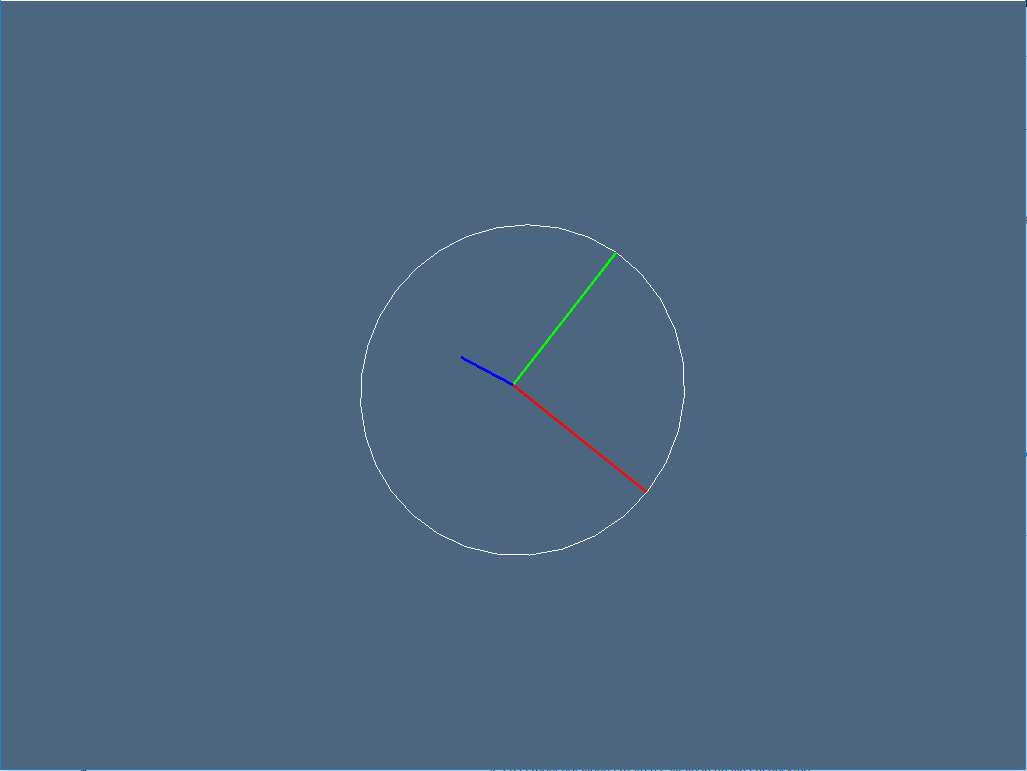

In [2]:
#voglio costruire una corona circolare
# il raggio lo chiamo v, l'angolo u. Ora v non è più fisso, varia tra un minimo e un massimo.
# u varia sempre tra 0 e 2PI, v tra 0 e R 

R = 1
x = lambda (v,u) : v * cos(u)
y = lambda (v,u) : v * cos(u)
dom = PROD([INTERVALS(2*PI)(32),INTERVALS(R)(32)])
MAP([x,y])(dom)
VIEW(MAP([x,y])(dom))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000D966060> >

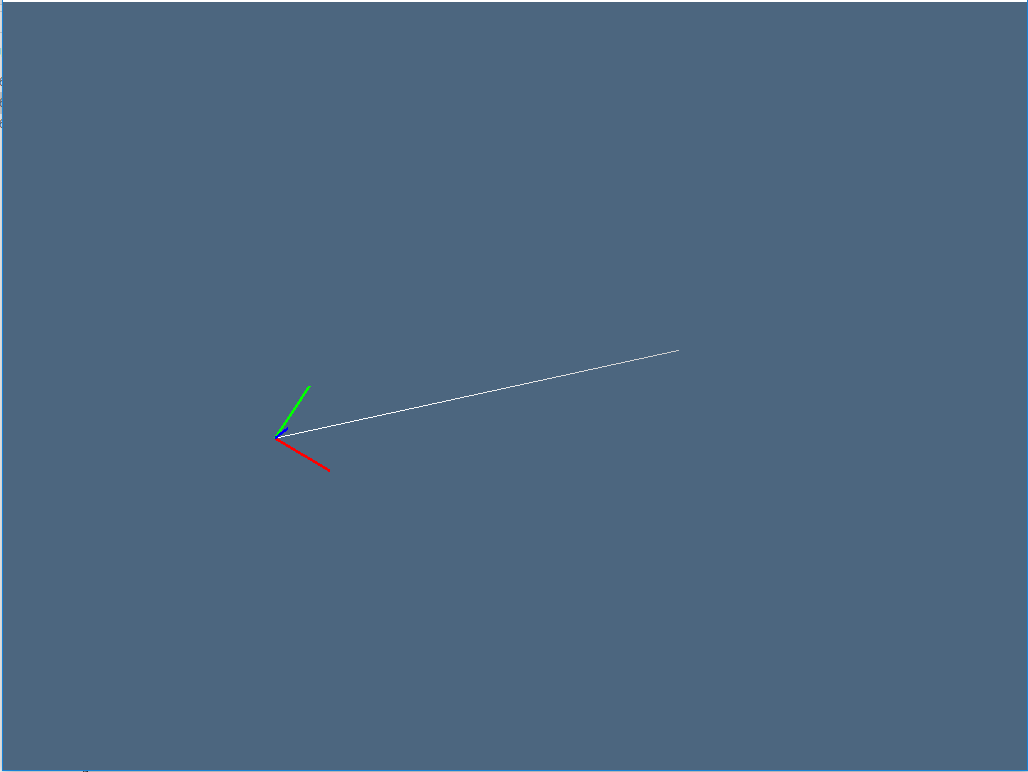

In [3]:
#per trasformarlo in una corona devo cambiare il dominio

dom = T(2)(0.5)(PROD([INTERVALS(2*PI)(32),INTERVALS(R/2)(32)]))
VIEW(MAP([x,y])(dom))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000D883990> >

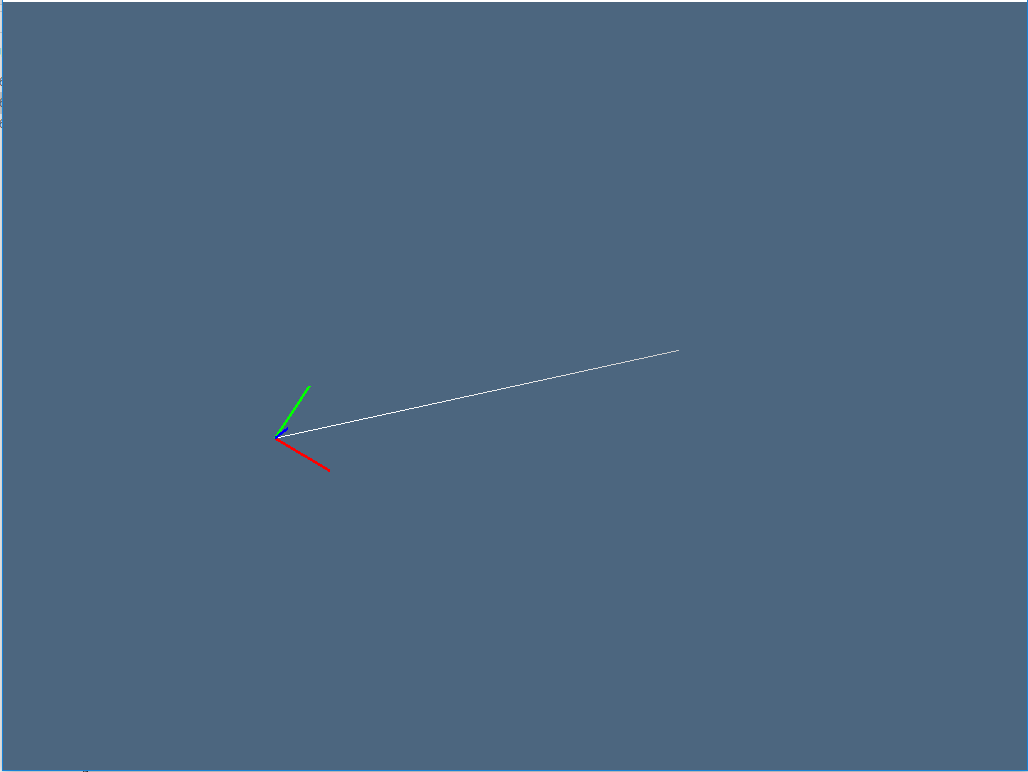

In [21]:
#funzione per una corona circolare


def ring(args):
    R1, R2 = args
    x = lambda (u,v): v*cos(u)
    y = lambda (u,v): v*sin(u)
    dom = T(2)(R1)(PROD([INTERVALS(2*PI)(32), INTERVALS(R2-R1)(32)]))
    return MAP([x,y])(dom)
VIEW(ring([2,3]))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000DDDD960> >

In [4]:
#CURVA DI BEZIER 

b=BEZIER(S1)([[0,0],[1,0],[0,1],[0,0]])
VIEW(MAP(b)(INTERVALS(1)(32)))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000DEA8930> >

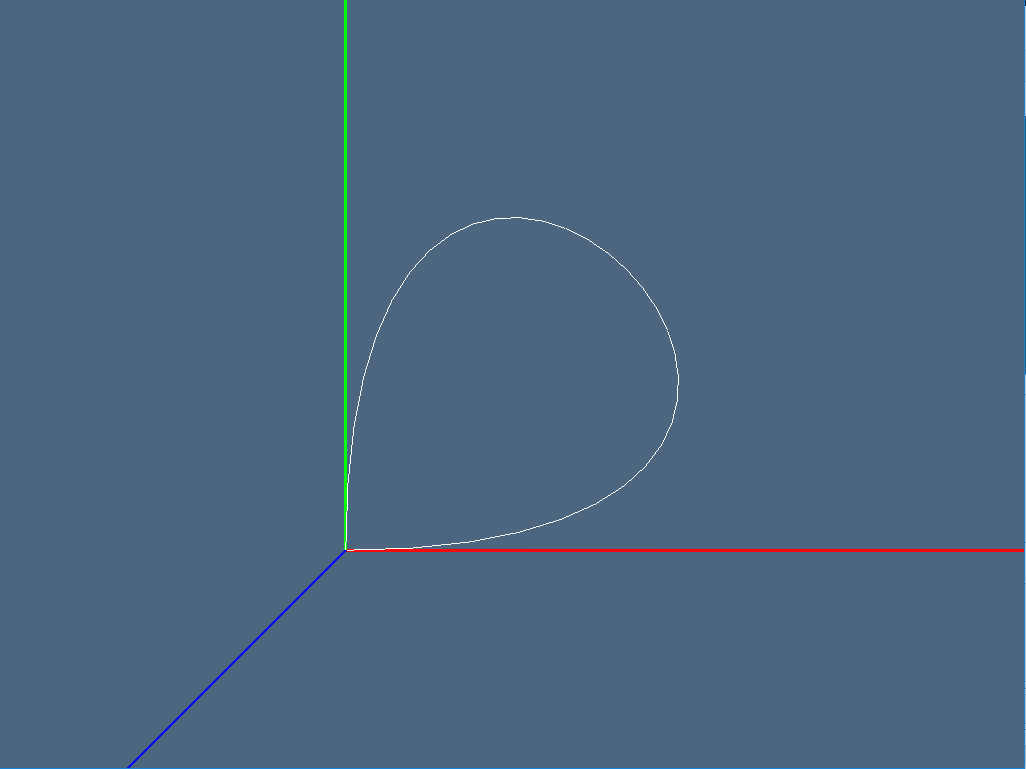

In [22]:
b=BEZIER(S1)([[0,0],[1,0],[0,0],[0,1],[0,0]])
VIEW(MAP(b)(INTERVALS(1)(32)))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000DDDD0C0> >

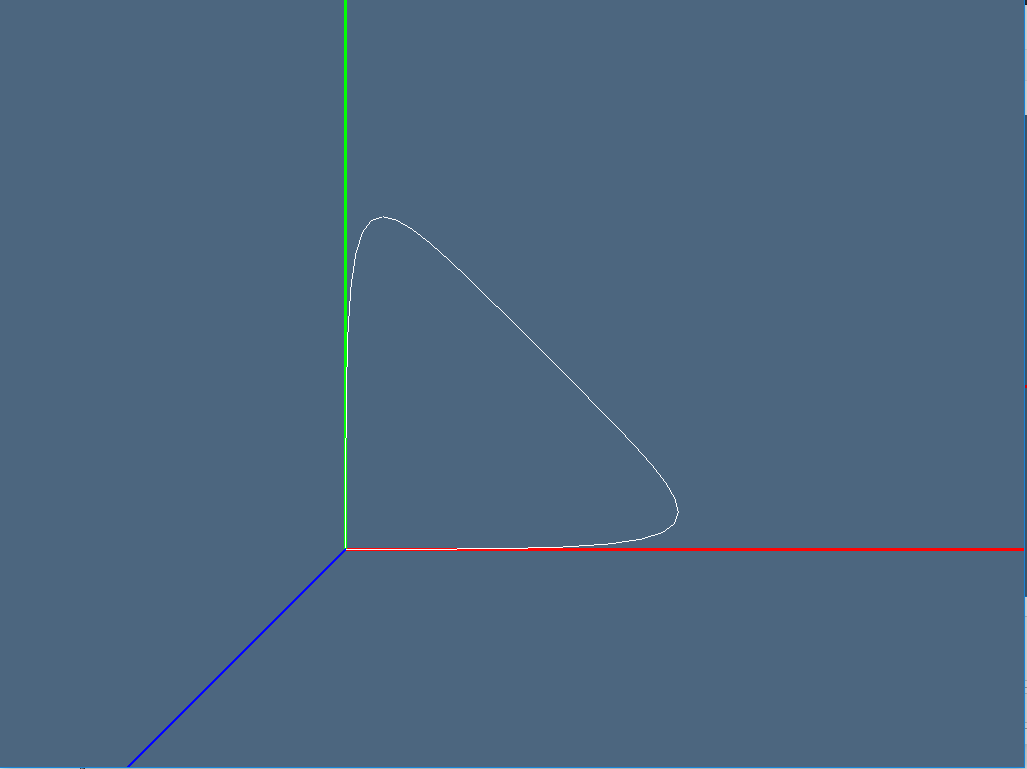

In [24]:
b1=BEZIER(S1)([[0,0],[1,0],[-1,-1],[0,1],[0,0]])
MAP(b)(INTERVALS(1)(32))
VIEW(MAP(b)(INTERVALS(1)(32)))
b2=BEZIER(S1)([[0,0],[1,0],[-2,-2],[0,1],[0,0]])
MAP(b)(INTERVALS(1)(32))
VIEW(MAP(b)(INTERVALS(1)(32)))
bb=BEZIER(S2)([b1,b2])

dom=PROD([INTERVALS(1)(32),INTERVALS(1)(1)])
VIEW(MAP(bb)(dom))
#interpolazione transfinita
VIEW(SKEL_1(MAP(bb)(dom))
#dividendo il sercondo intervallo per 4
dom = PROD([INTERVALS(1)(32), INTERVALS(1)(1)])
VIEW(MAP(bb)(dom))

SyntaxError: invalid syntax (<ipython-input-24-cf0ab1984bf6>, line 14)

In [25]:
VIEW(SKEL_1(MAP(BZ)(dom)))

NameError: name 'BZ' is not defined

In [11]:
#esempio
x = lambda (u,v) : 1.5 * cos(u)
y = lambda (u,v) : 1.5 * cos(u)
b = BEZIER(S1)([[1,0.5],[1,1],[0.5,1]])
bb = BEZIER(S2)([[b,CONS([x,y])]])
VIEW(SKEL_1(MAP(bb)(dom)))

IndexError: list index out of range

In [27]:
x = lambda (u,v): 1.5*cos(u)
y = lambda (u,v): 1.5*sin(u)
z = lambda p: 1
b = BEZIER(S1)([[1,.5,1],[1,1,2],[.5,1,3]])
bb = BEZIER(S2)([b,CONS([x,y,z])])
VIEW(SKEL_1(MAP(bb)(dom)))

#altro esempio 
x = lambda u : cos(u)
y = lambda u : cos(u)
z = lambda u : u/(2*PI) # in questo modo mi fermo a quota 1, se mi voglio fermare ad una quota h devo moltiplicare il tutto per h 

# in questo modo ottengo una spirale che parte da 0 a 2PI
dom = INTERVALS(2*PI)(18)

def spiral(r,h,n):
    x = lambda (u,) : cos(u)
    y = lambda (u,) : cos(u)
    z = lambda (u,) : h*u/(2*PI)
    dom = INTERVALS(2*n*PI)(36*n)
    return MAP(CONS([x,y,z]))(dom)
VIEW(spiral(0.5,0.1,20))

IndexError: list index out of range

In [28]:
#usiamo due spirali per creare una superficie sfruttando bezier
def spiralObject(args):
    R, h, n = args
    x = lambda (u,): R*cos(u)
    y = lambda (u,): R*sin(u)
    z = lambda (u,): h*u/(2*PI)
    dom = INTERVALS(n*2*PI)(36*n)
    return MAP(CONS([x,y,z]))(dom)

VIEW(spiralObject([2,1,4]))

TypeError: spiralObject() takes exactly 1 argument (2 given)

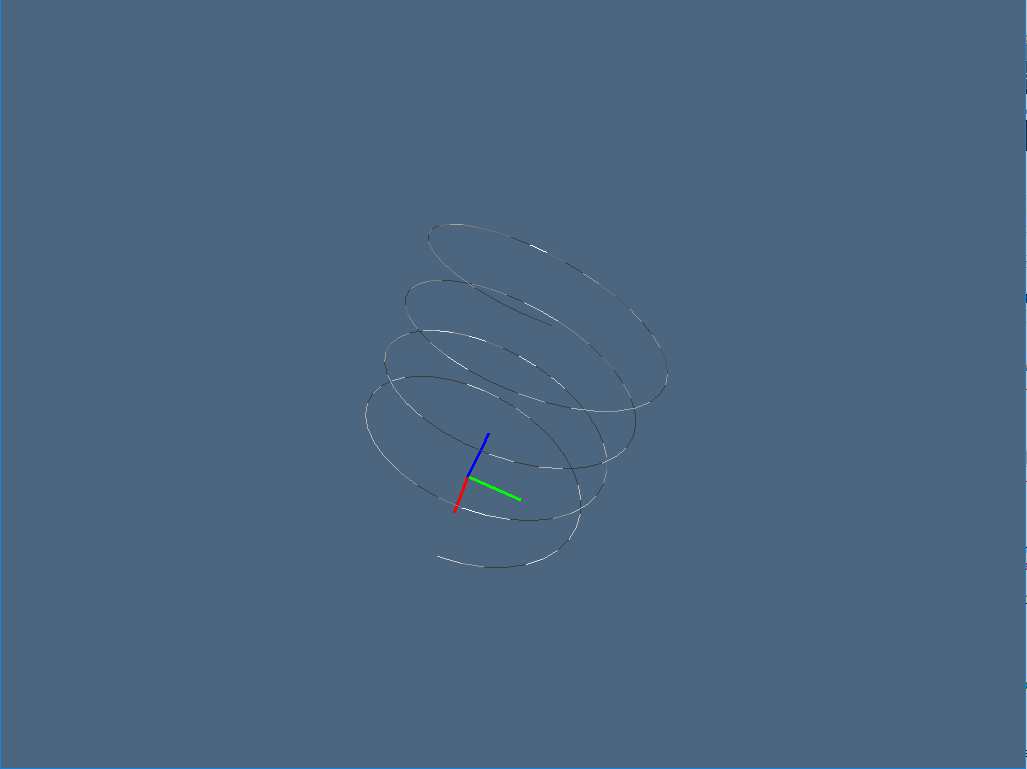

In [30]:
def spiral(args):
    R, h = args
    x = lambda (u,v): R*cos(u)
    y = lambda (u,v): R*sin(u)
    z = lambda (u,v): h*u/(2*PI)
    return CONS([x,y,z])

s1 = spiral([.5,.2])
s2 = spiral([1,.2])
sup = BEZIER(S2)([s1,s2])
dom = lambda n: PROD([INTERVALS(2*n*PI)(36*n),INTERVALS(1)(1)])
VIEW(MAP(sup)(dom(10)))
# Il dominio sono tetraedri. Per ottenere una resa perfetta il dominio dovrebbe essere suddiviso in triangoli in modo
# che tutti gli oggetti del dominio siano complanari.

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x000000000DDE1960> >

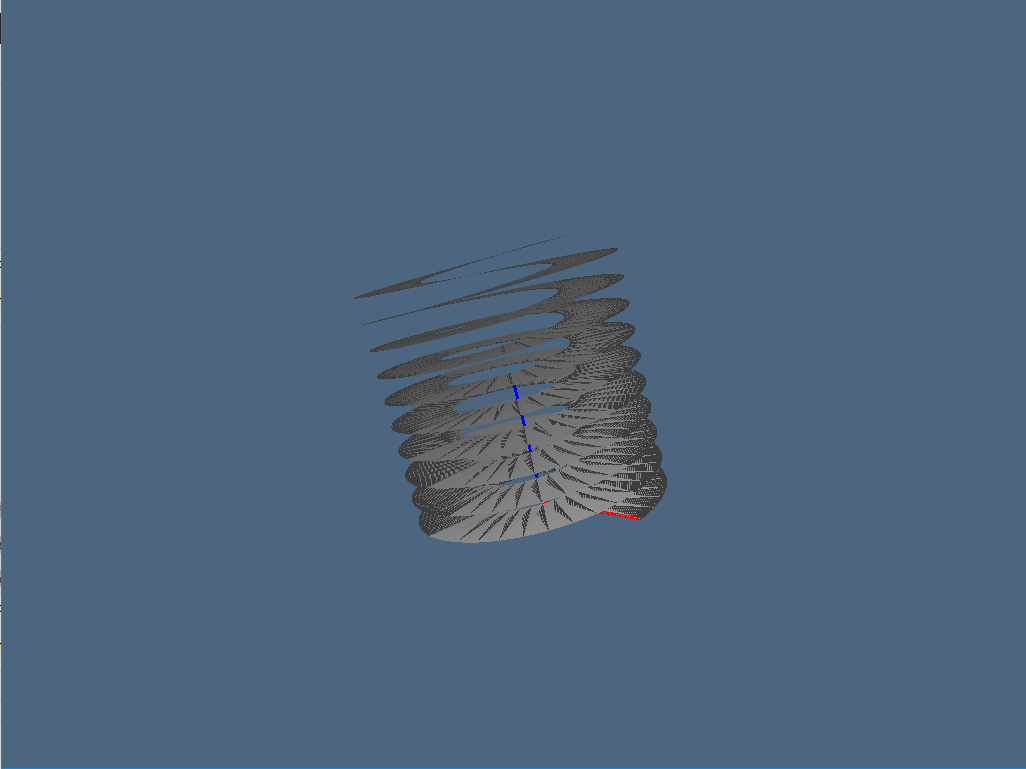